# Домашнее задание «Кейс-стади. Статистические показатели в Python: часть 1»

<pre>
ФИО: Никифоров Владимир
</pre>

Сделать анализ датасета Glass wine. 
https://www.kaggle.com/uciml/glass/kernels

https://www.kaggle.com/uciml/glass/downloads/glass-classification.zip/1

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as sts
import scipy.stats.mstats as mstats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from IPython.display import Image

import io
import requests

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('../data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


* Id number: 1 to 214 (removed from CSV file)
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

In [4]:
# рассмотрим данные: размер датасета
print(df.shape)
# информацию по датасету - типы и наличие NULL в столбцах
print(df.info())

(214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


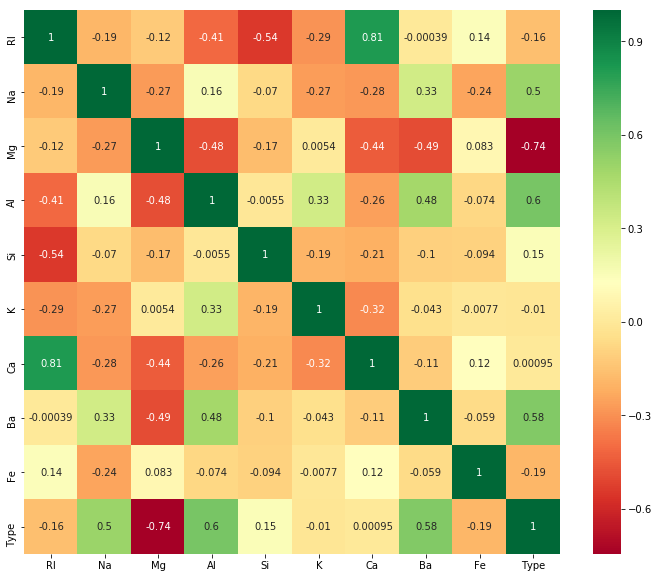

In [6]:
# Искомая переменная - тип = Type, полезно понять зависимость нашей категориальной переменной Type от признаков
# проверим корреляцию признаков
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

Есть примеры средней и сильной положительной и отрицательной корреляции

In [8]:
# средняя корреляция
df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>=0.3) & (abs(df.corr(method ='pearson'))<=0.7)].dropna(how='all').dropna(axis=1, how='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Type
RI,NaN,NaN,NaN,-0.407326,-0.542052,NaN,NaN,NaN,NaN
Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326603,0.502898
Mg,NaN,NaN,NaN,-0.481799,NaN,NaN,-0.443750,-0.492262,NaN
Al,-0.407326,NaN,-0.481799,NaN,NaN,0.325958,NaN,0.479404,0.598829
Si,-0.542052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,0.325958,NaN,NaN,-0.317836,NaN,NaN
Ca,NaN,NaN,-0.443750,NaN,NaN,-0.317836,NaN,NaN,NaN
Ba,NaN,0.326603,-0.492262,0.479404,NaN,NaN,NaN,NaN,0.575161
Type,NaN,0.502898,NaN,0.598829,NaN,NaN,NaN,0.575161,NaN


In [9]:
# сильная корреляция
df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>0.7) & (abs(df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all')

,RI,Mg,Ca,Type
RI,NaN,NaN,0.810403,NaN
Mg,NaN,NaN,NaN,-0.744993
Ca,0.810403,NaN,NaN,NaN
Type,NaN,-0.744993,NaN,NaN


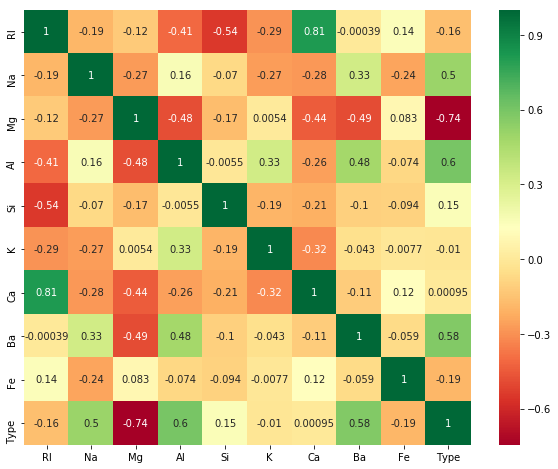

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(method ='pearson'),annot=True,cmap="RdYlGn");

Есть значимая корреляция между RI и Si/Ca.

Посмотрим попарную взаимосвязь перемернных и их распределения

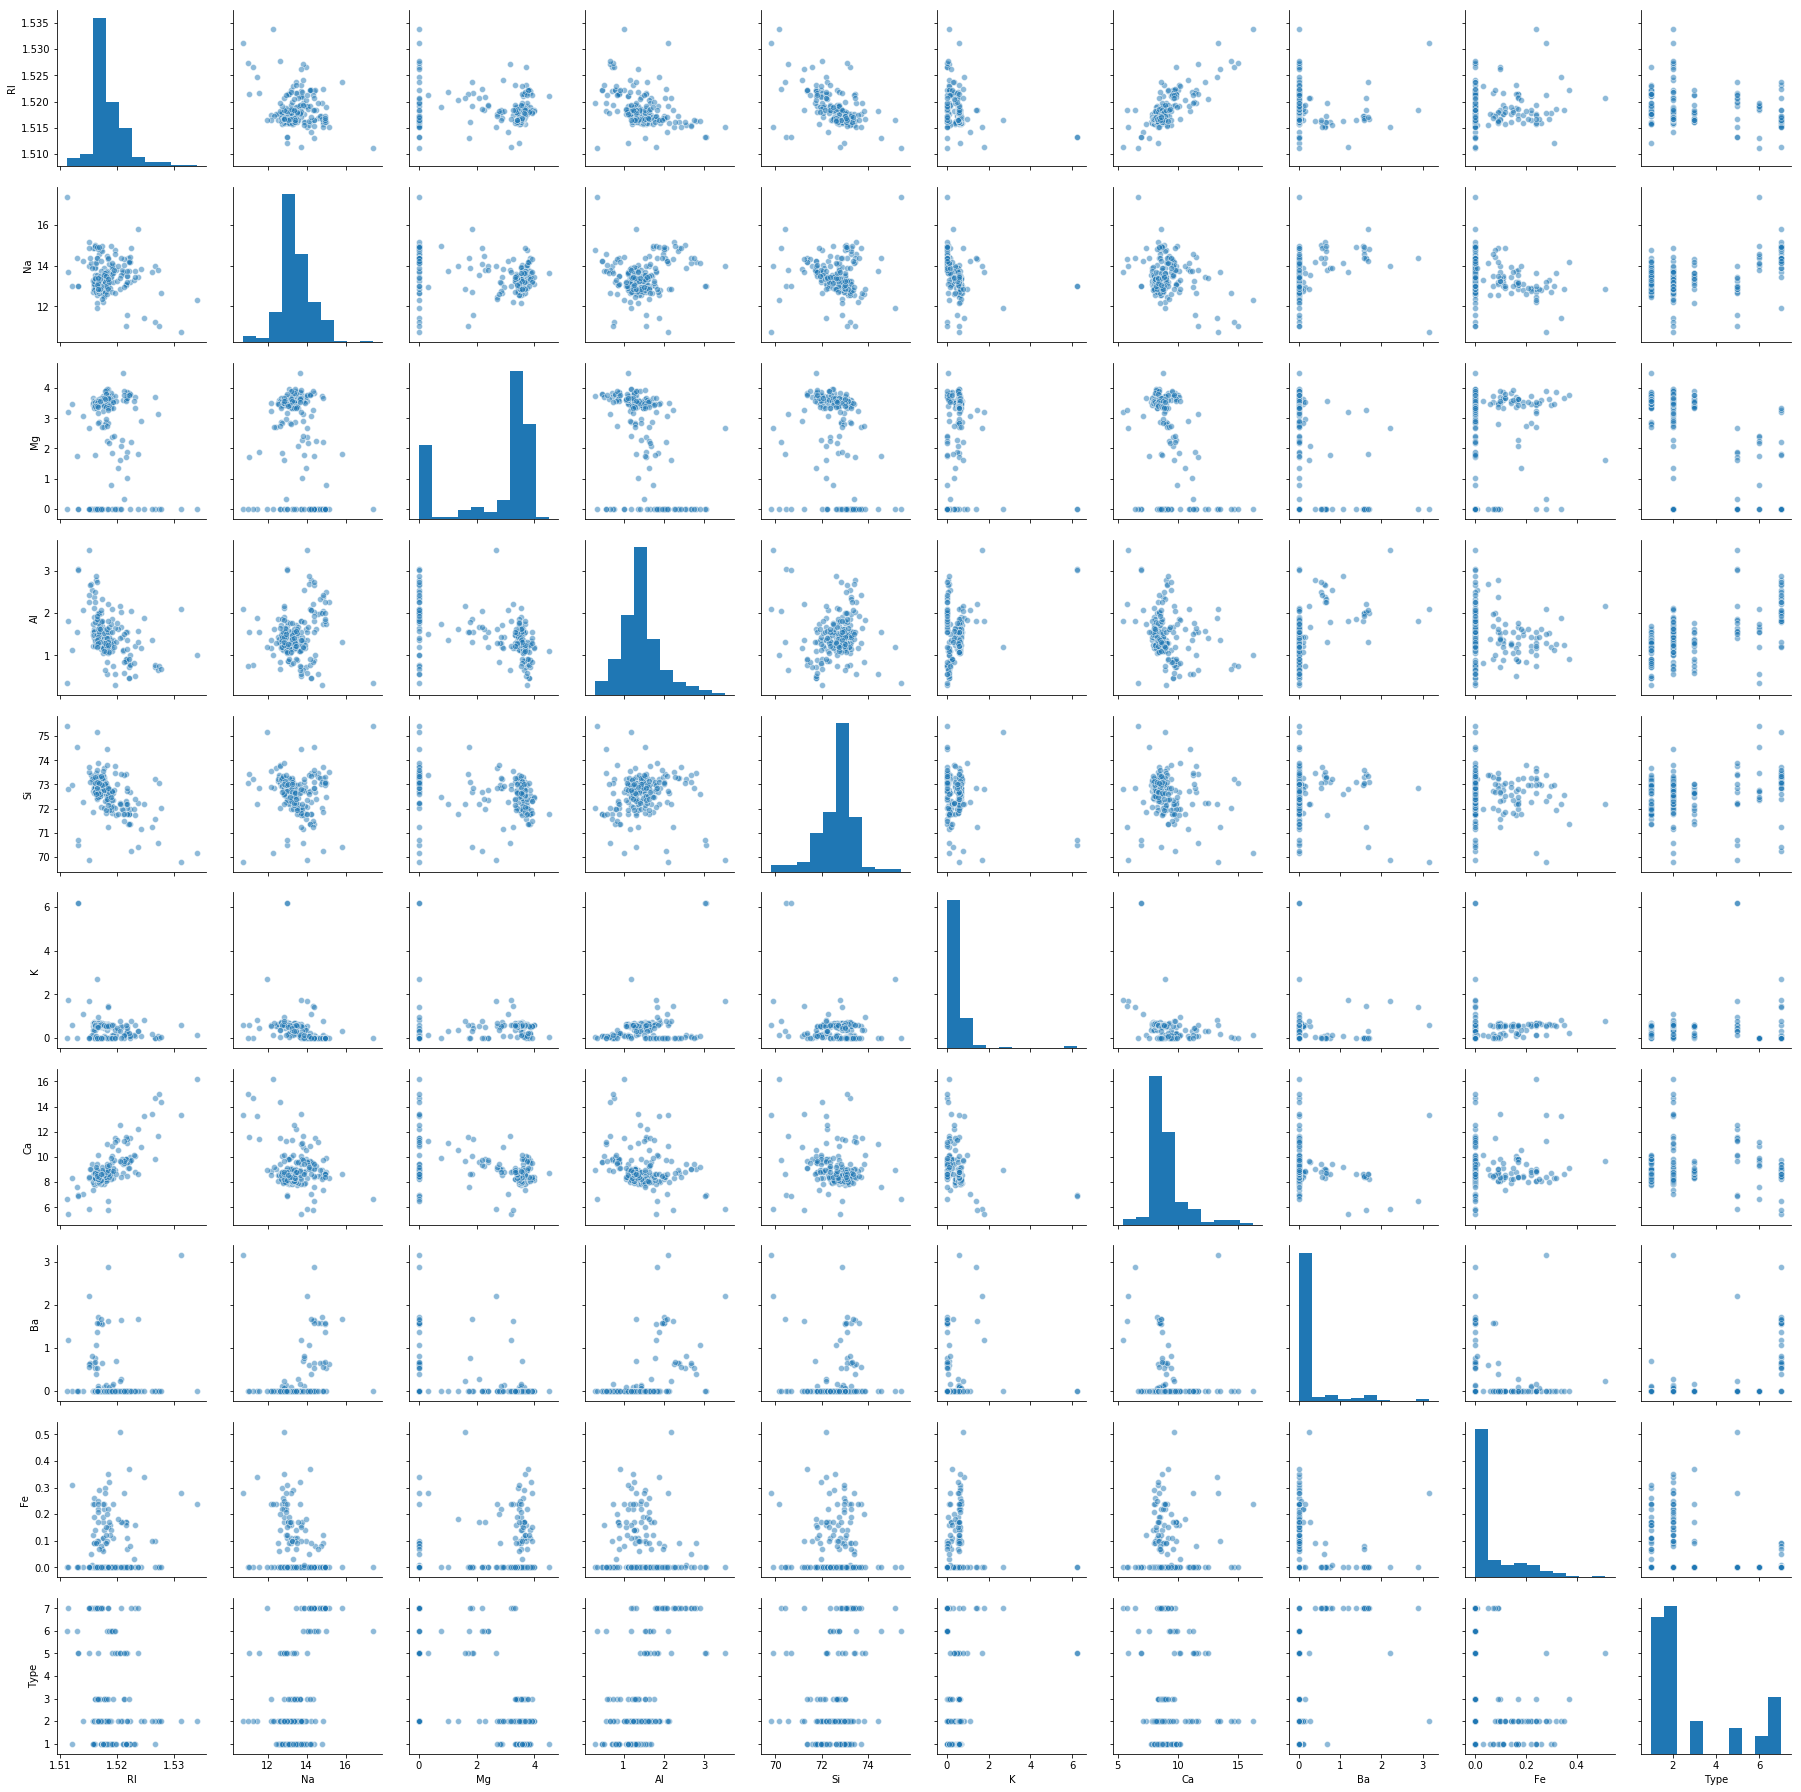

In [16]:
sns.pairplot(data=df,plot_kws={'alpha':0.5},palette='hot');

В разрезе каждого класса графики взаимосвязей выглядят так:

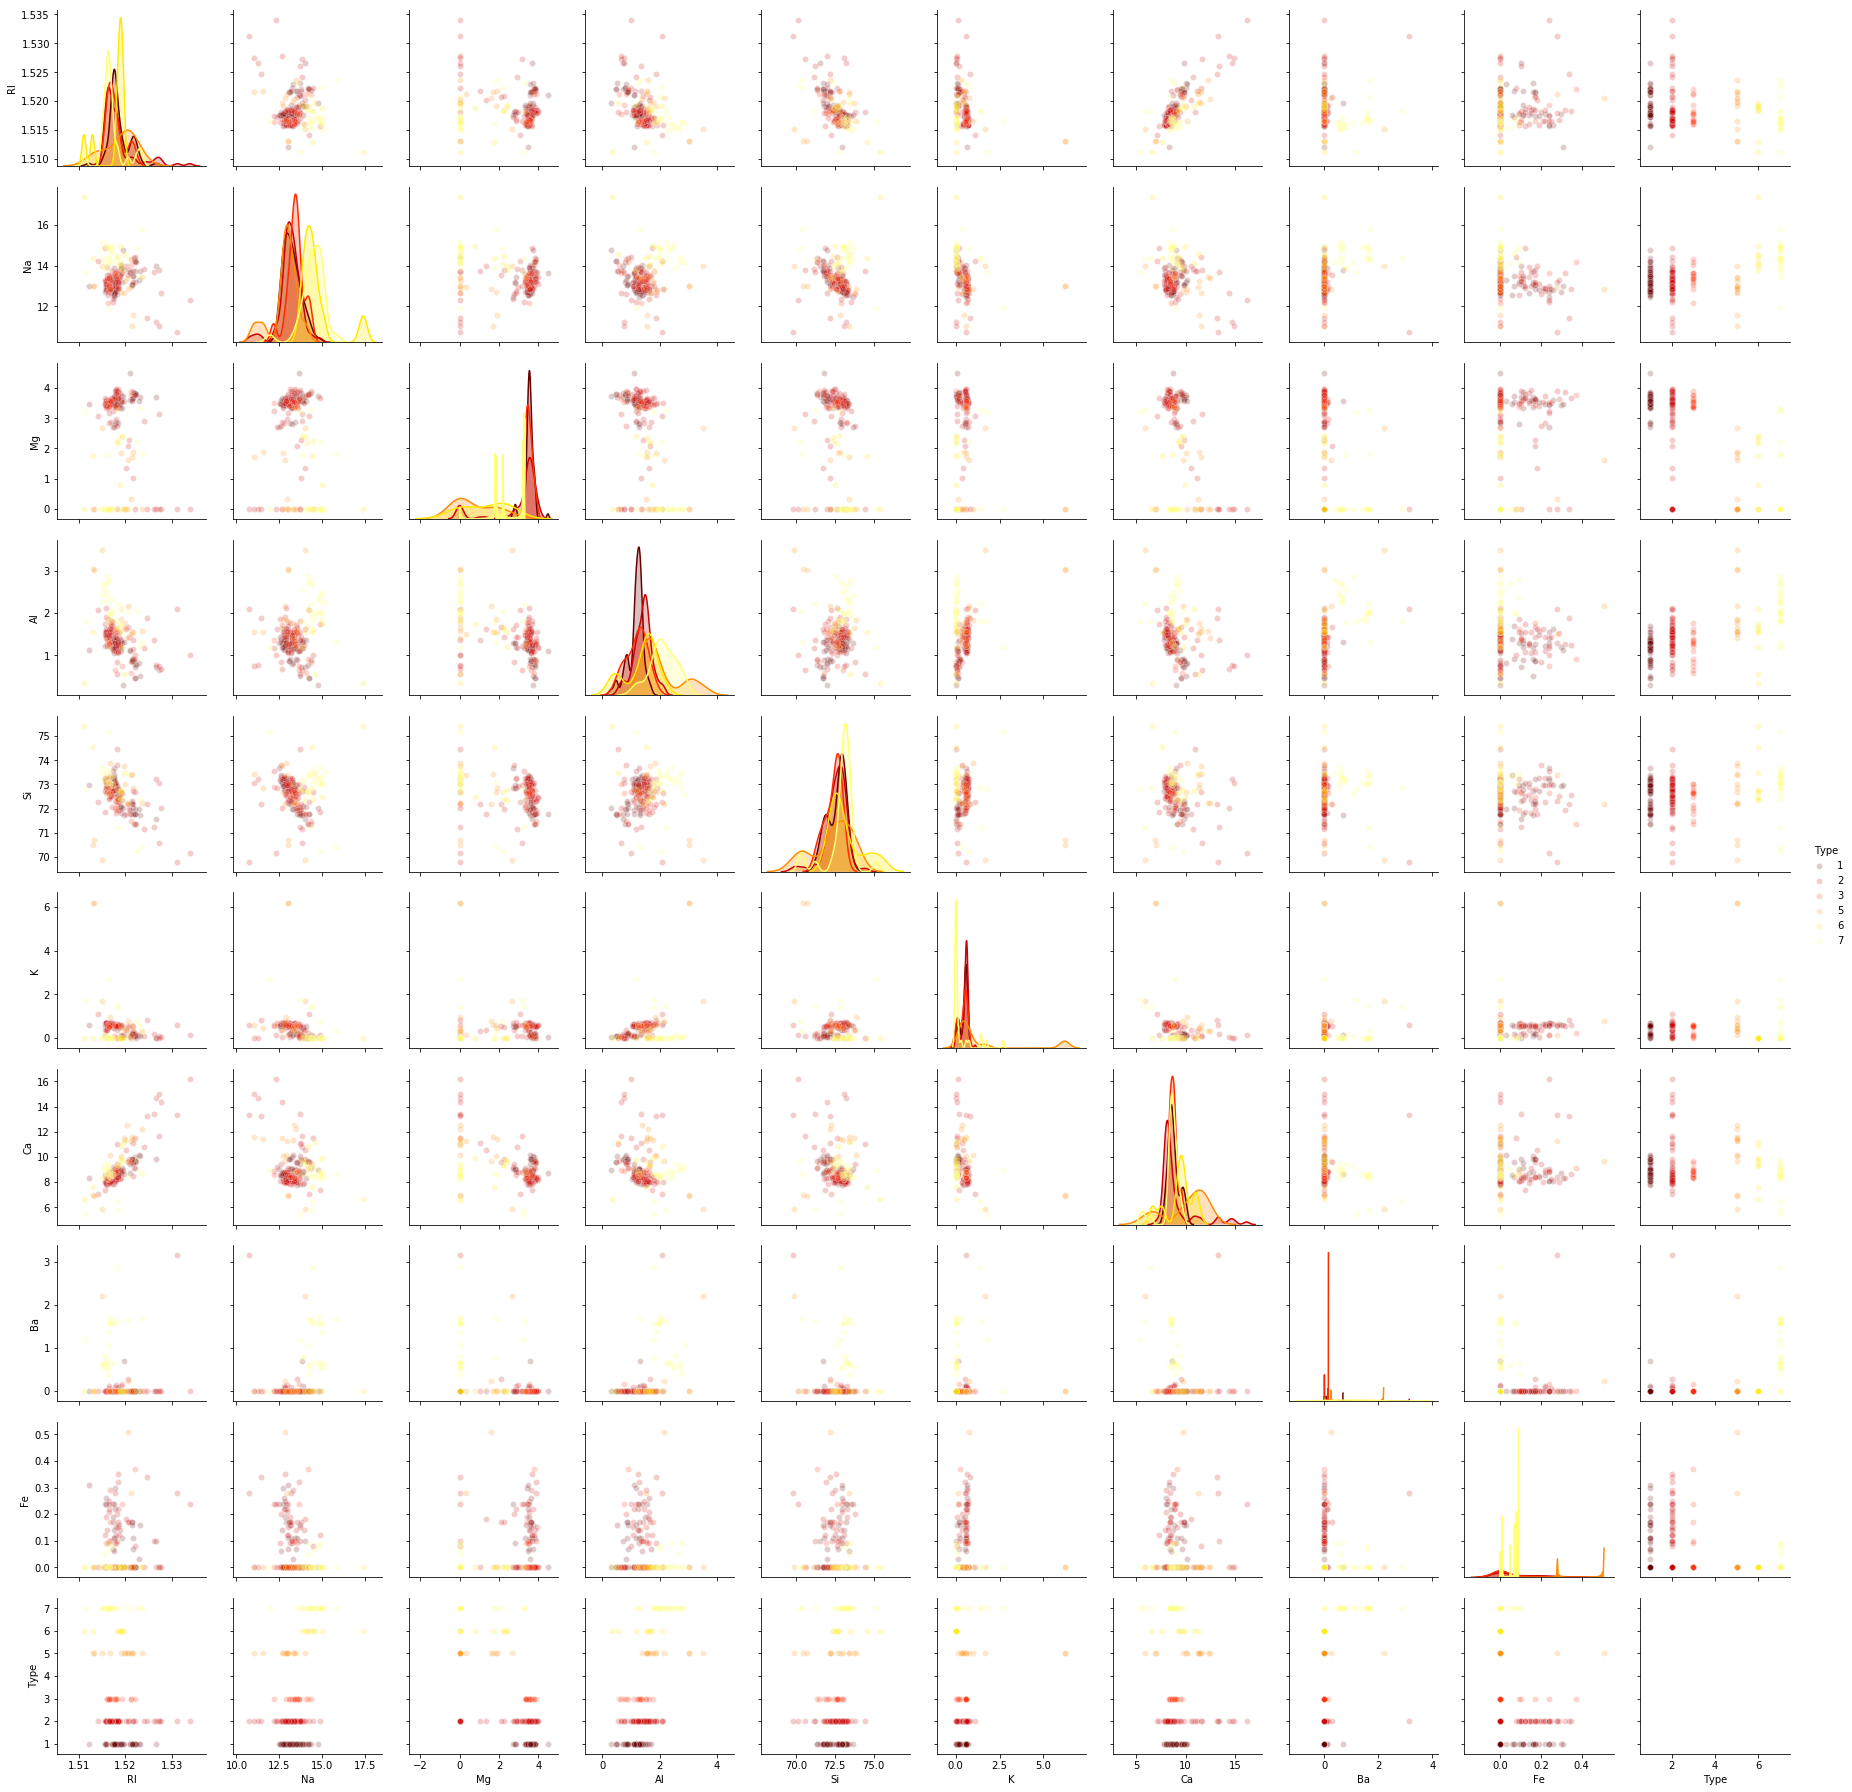

In [65]:
sns.pairplot(data=df,hue='Type',plot_kws={'alpha':0.2},palette='hot');

Обратим внимание на гистограмму Type - распределение классов несбаллансированно - классов 1 и 2 типа значительно больше всех остальных классов.

В признаках K, Ba, Fe есть выбросы. Проверим их на усатом графике boxplot:

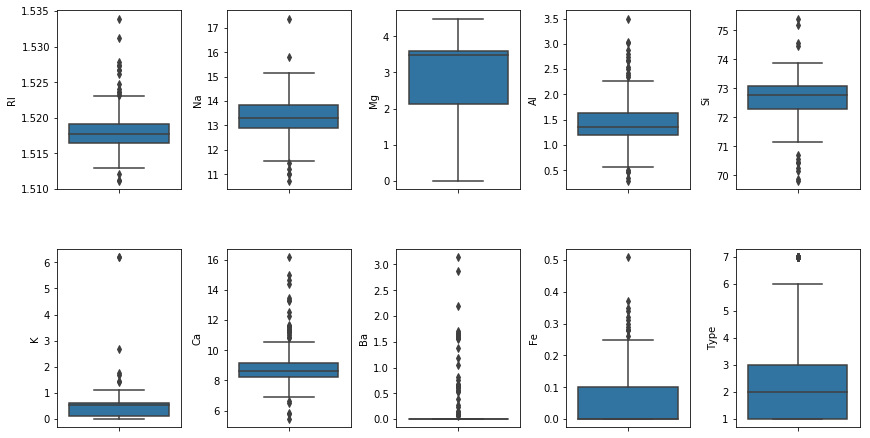

In [31]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(12, 6))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Процент выбросов в данных:

In [32]:
for k, v in df.items():
    # считаем точки в квантиле 25% от медианы
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    # выбросы находятся за этими точками
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Выбросы колнки %s = %.2f%%" % (k, perc))

Выбросы колнки RI = 7.94%
Выбросы колнки Na = 3.27%
Выбросы колнки Mg = 0.00%
Выбросы колнки Al = 8.41%
Выбросы колнки Si = 5.61%
Выбросы колнки K = 3.27%
Выбросы колнки Ca = 12.15%
Выбросы колнки Ba = 100.00%
Выбросы колнки Fe = 6.07%
Выбросы колнки Type = 17.76%


Ввиду несбаллансированной выборки классов Type нельзя однозначно сказать, что значения Ba являются выбросами, т.к. самих примеров ненулевых Ba много для классов, не являющихся 1 и 2. Убрав такие "выбросы" для Ba мы лишимся характерных значений для оставшихся классов 3,4,5,6,7.

Рассмотрим детально признаки с корреляцию более 50%

In [59]:
df_cor = df.corr(method ='pearson')
l = df_cor[(abs(df_cor)>0.5) & (df_cor<1)]['Type']

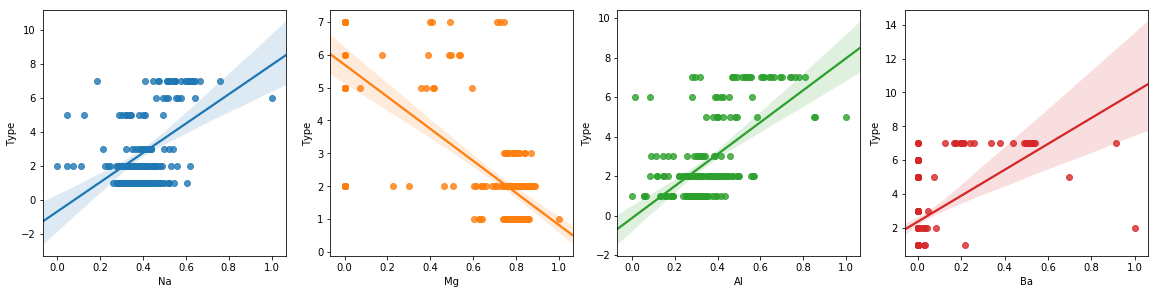

In [63]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = list(l[abs(l)>0].index)
x = df.loc[:,column_sels]
y = df['Type']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=len(list(l[abs(l)>0].index)), nrows=1, figsize=(16, 4))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Но Type является категориальной переменной и смотреть корреляцию с ним некорректно, т.к. уровень 2 категориальной переменно не обязан быть больше уровня 1 и т.д.

Соответственно, выбросы возможно будет удалить только после оценки их вклада в классы с меньшим представлением - 3,4,5,6,7.

В текущем датасете, возможно, поможет объединить наиболее коррелируемые переменные в одну, чтобы уменьшить влияние от сильнокоррелируемых переменных на алгоритм обучения, тем самым позволив проявить себя другим переменным, которые могут дать некоторую дополнительную информацию при объяснении редко представленных классов.

"Ввиду несбаллансированной выборки классов Type нельзя однозначно сказать, что значения Ba являются выбросами, т.к. самих примеров ненулевых Ba много для классов, не являющихся 1 и 2. Убрав такие "выбросы" для Ba мы лишимся характерных значений для оставшихся классов 3,4,5,6,7" - можно было сравнить количество элементов в каждом типе (type) и например, попробовать сбалансировать выборку с помощью генерации элементов в тот класс, в котором мало элементов, либо уменьшить количество данных в слишком большой выборке. Посмотрим попарную взаимосвязь перемернных и их распределения In [16]: sns.pairplot(data=df,plot_kws={'alpha':0.5},palette='hot'); - можно было найти графики например со смещением и рассказать, как от этого можно избавиться (как сбалансировать распределение). 